1: Imports & Load Splits

In [16]:
import pickle

with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("✅ Loaded corrected splits:")
print(f"  • X_train: {X_train.shape}")
print(f"  • X_test : {X_test.shape}")
print(f"  • y_train: {y_train.shape}")
print(f"  • y_test : {y_test.shape}")


✅ Loaded corrected splits:
  • X_train: (32950, 45)
  • X_test : (8238, 45)
  • y_train: (32950,)
  • y_test : (8238,)


2: Train & Evaluate Default Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Train the default Decision Tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

# 2. Predict on test set
y_pred = clf_default.predict(X_test)
y_proba = clf_default.predict_proba(X_test)[:, 1]

# 3. Compute metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)
roc   = roc_auc_score(y_test, y_proba)

# 4. Print results
print("▶️ Default Decision Tree Performance:")
print(f"  • Accuracy : {acc:.4f}")
print(f"  • Precision: {prec:.4f}")
print(f"  • Recall   : {rec:.4f}")
print(f"  • F1 Score : {f1:.4f}")
print(f"  • ROC AUC  : {roc:.4f}")


▶️ Default Decision Tree Performance:
  • Accuracy : 0.8971
  • Precision: 0.5426
  • Recall   : 0.5485
  • F1 Score : 0.5456
  • ROC AUC  : 0.7449


3: Confusion Matrix & ROC Curve

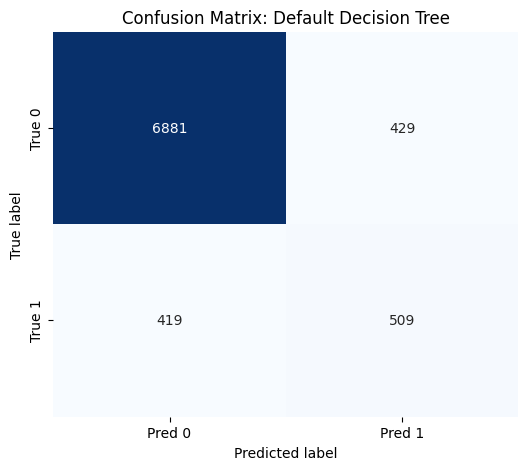

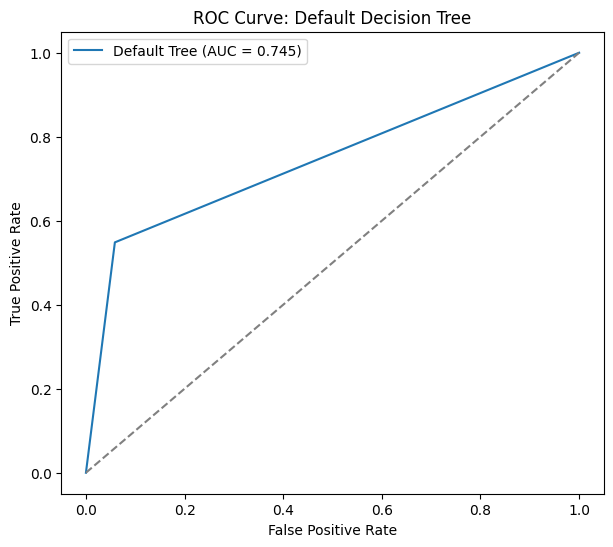

In [18]:
# %% Cell 3: Confusion Matrix & ROC Curve

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['True 0', 'True 1']
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix: Default Decision Tree")
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"Default Tree (AUC = {roc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Default Decision Tree")
plt.legend()
plt.show()
